<a href="https://colab.research.google.com/github/ColinDonahoe119/Sustainable_Development_Goals/blob/main/sdg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
gdp_p_capita = pd.read_csv('/content/drive/MyDrive/gdp_per_capita.csv')
gdp_p_capita = gdp_p_capita[['Country Name','Code','2019']]
gdp_p_capita.dropna()

,Country Name,Code,2019
1,Africa Eastern and Southern,AFE,1530.059177
2,Afghanistan,AFG,494.179350
3,Africa Western and Central,AFW,1777.918672
4,Angola,AGO,2809.626088
5,Albania,ALB,5395.659532
...,...,...,...
260,Samoa,WSM,4322.868457
261,Kosovo,XKX,4416.108358
263,South Africa,ZAF,6624.761865
264,Zambia,ZMB,1305.001031


In [5]:
african_countries = [
    'DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM',
    'COG', 'COD', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA',
    'GIN', 'GNB', 'CIV', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT',
    'MUS', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE',
    'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE'
]

# Filter the DataFrame
gdp_africa = gdp_p_capita[gdp_p_capita['Code'].isin(african_countries)]


Text(0.5, 1.0, 'African Nations GDP')

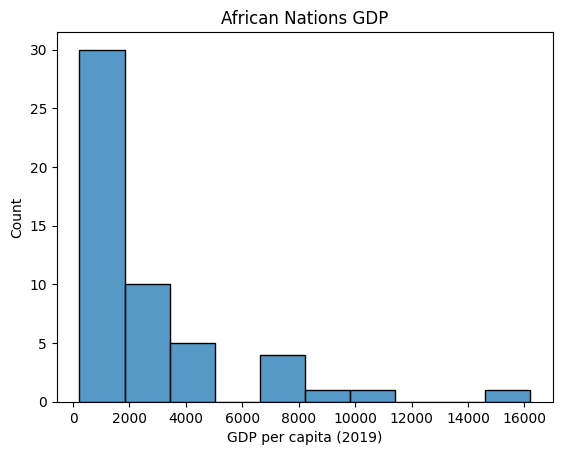

In [6]:
sns.histplot(gdp_africa["2019"], stat='count', bins=10)
plt.xlabel('GDP per capita (2019)')
plt.title('African Nations GDP')

Text(0.5, 1.0, 'African Nations with GDP per capita less than $3000')

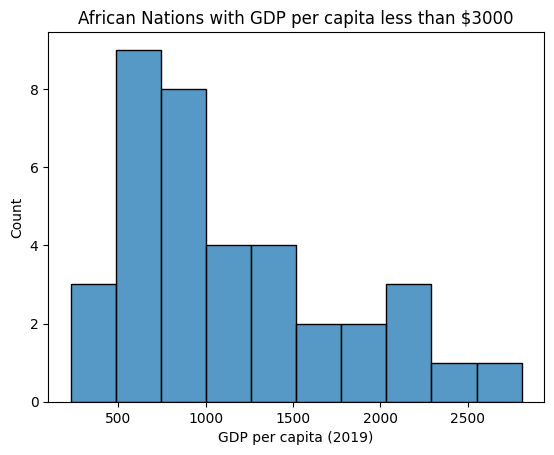

In [7]:
gdp_africa2 = gdp_africa[(gdp_africa['2019'] <= 3000)]
sns.histplot(gdp_africa2["2019"], stat='count', bins=10)
plt.xlabel('GDP per capita (2019)')
plt.title('African Nations with GDP per capita less than $3000')

In [8]:
gdp_africa.describe()

,2019
count,52.000000
mean,2630.073390
std,3096.186188
min,228.213589
25%,766.397872
50%,1359.141484
75%,3279.979540
max,16213.480757


In [9]:
developed_countries = ['AUS', 'BEL', 'FRA', 'DEU', 'ITA', 'NLD', 'PRT', 'ESP', 'GBR', 'USA', 'CAN']
gdp_developed = gdp_p_capita[gdp_p_capita['Code'].isin(developed_countries)]
print(gdp_developed)

       Country Name Code          2019
13        Australia  AUS  54875.285956
17          Belgium  BEL  46591.491607
35           Canada  CAN  46338.340956
55          Germany  DEU  46794.899292
70            Spain  ESP  29555.315699
77           France  FRA  40578.644285
81   United Kingdom  GBR  43070.498360
116           Italy  ITA  33641.633751
176     Netherlands  NLD  52476.273253
194        Portugal  PRT  23330.817289
251   United States  USA  65279.529026


Text(0.5, 1.0, 'Developed Nations GDP')

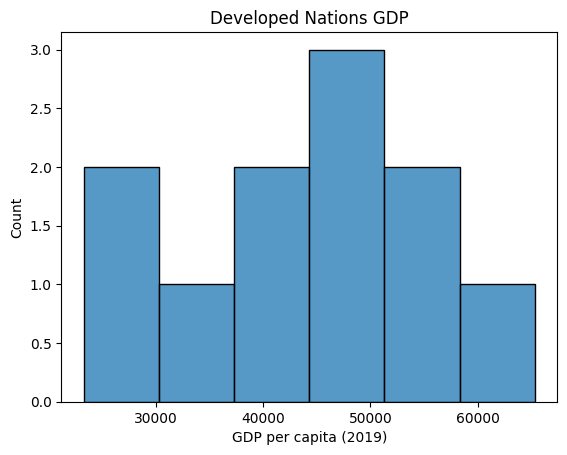

In [10]:
sns.histplot(gdp_developed["2019"], stat='count', bins=6)
plt.xlabel('GDP per capita (2019)')
plt.title('Developed Nations GDP')

In [11]:
european_countries = [
    'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BLR', 'BGR', 'CHE', 'CYP',
    'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GEO', 'GRC', 'HRV',
    'HUN', 'IRL', 'ISL', 'ITA', 'KAZ', 'KGZ', 'LIE', 'LTU', 'LUX', 'LVA', 'MCO',
    'MDA', 'MKD', 'MLT', 'MNE', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR',
    'SRB', 'SVK', 'SVN', 'SWE', 'TJK', 'TUR', 'UKR', 'UZB', 'VAT'
]
# Filter the DataFrame
gdp_europe = gdp_p_capita[gdp_p_capita['Code'].isin(european_countries)]

# Display or save the filtered DataFrame
#print(gdp_europe)

In [12]:
gdp_europe.describe()

,2019
count,52.000000
mean,34248.313823
std,39090.527283
min,890.544402
25%,8537.289038
50%,21453.292885
75%,47028.976604
max,189487.147128


In [13]:
sdp = pd.read_csv('/content/drive/MyDrive/sustainable_development_report_2023.csv')

In [14]:
sdg_africa = sdp[sdp['country_code'].isin(african_countries)]
sdg_USA = sdp[sdp['country_code'] == 'USA']

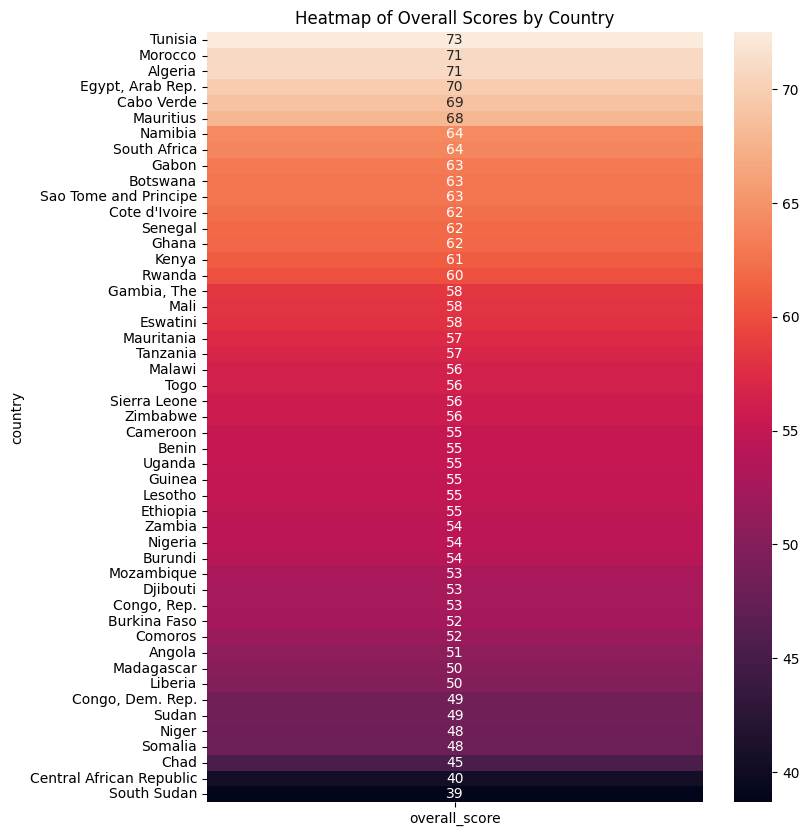

In [15]:
tb = pd.pivot_table(sdg_africa, index=['country'], values='overall_score', aggfunc="mean")

tb_sorted = tb.sort_values(by='overall_score', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(tb_sorted, annot=True)
plt.title("Heatmap of Overall Scores by Country")
plt.show()

In [16]:
print(sdp['overall_score'].mean())
sdg_africa['overall_score'].mean()

67.5491968813253


np.float64(56.726405525102045)

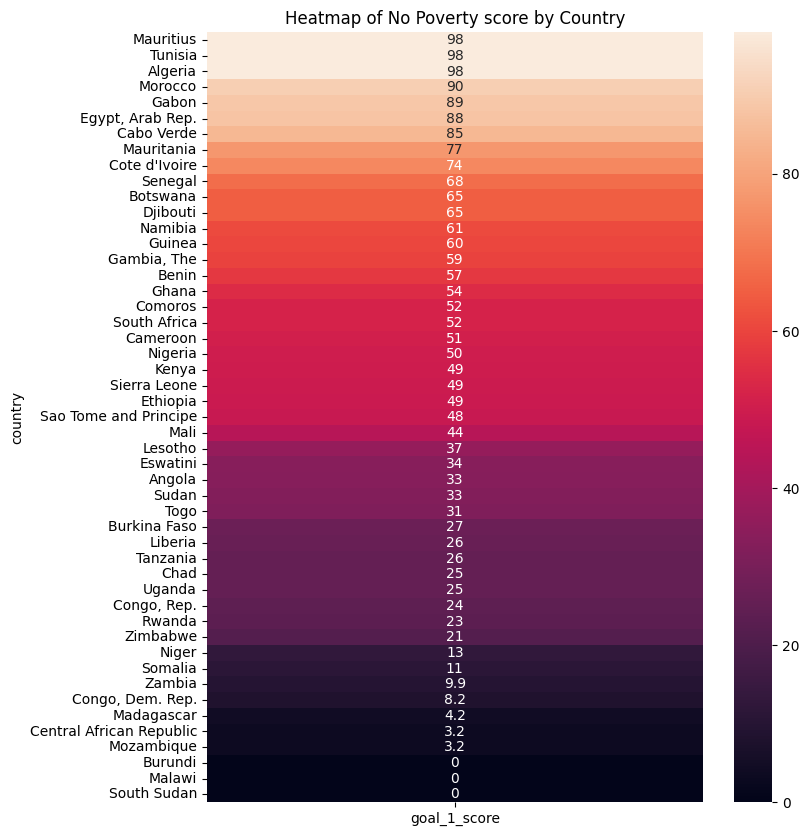

In [17]:
tb = pd.pivot_table(sdg_africa, index=['country'], values='goal_1_score', aggfunc="mean")

tb_sorted = tb.sort_values(by='goal_1_score', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(tb_sorted, annot=True)
plt.title("Heatmap of No Poverty score by Country")
plt.show()

In [18]:
print(sdp['goal_1_score'].mean())
sdg_africa['goal_1_score'].mean()

75.23440066225164


np.float64(43.85765306122449)

<Axes: title={'center': 'Heatmap of  by Country'}, ylabel='country'>

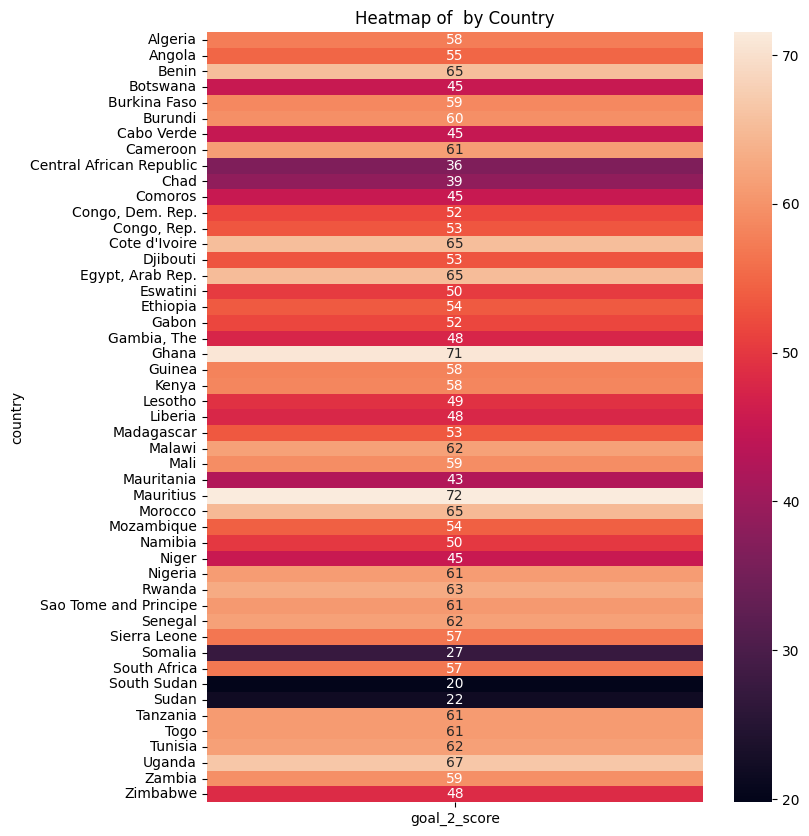

In [19]:
tb = pd.pivot_table(sdg_africa, index=['country'],  values='goal_2_score', aggfunc="mean")  # columns=['device']
plt.figure(figsize=(8, 10))
plt.title("Heatmap of  by Country")
sns.heatmap(tb, annot=True)

In [20]:
print(sdp['goal_2_score'].mean())
sdg_africa['goal_2_score'].mean()

59.79910015789157


np.float64(53.74532512163265)

<Axes: ylabel='country'>

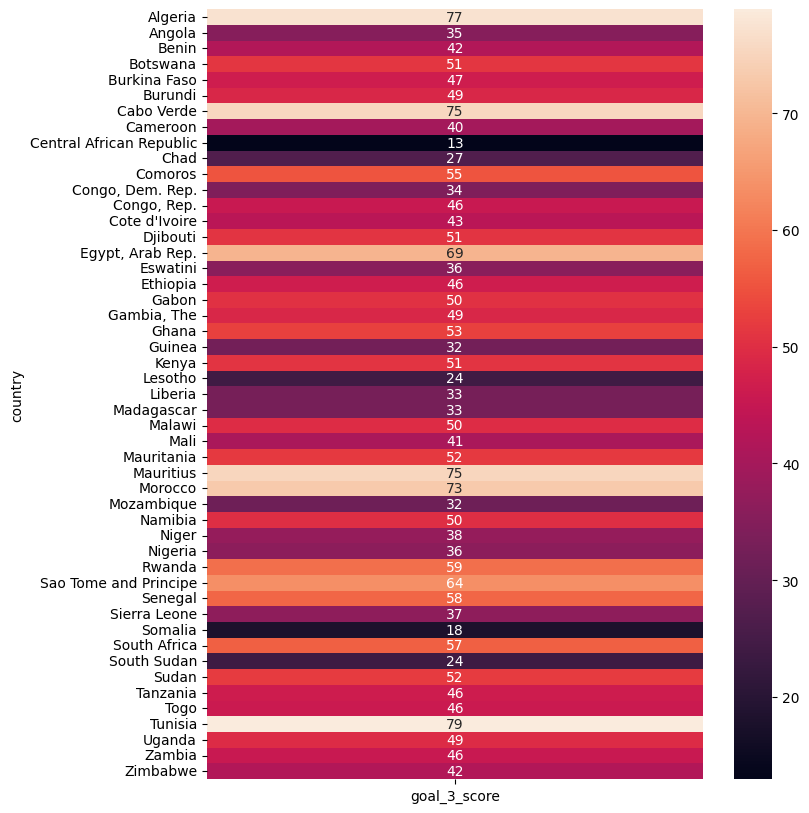

In [21]:
tb = pd.pivot_table(sdg_africa, index=['country'],  values='goal_3_score', aggfunc="mean")  # columns=['device']
plt.figure(figsize=(8, 10))
sns.heatmap(tb, annot=True)

In [25]:
print(sdp['goal_3_score'].mean())
print(sdg_africa['goal_3_score'].mean())

69.69407768939759
46.598552029183665


In [26]:
print(sdp['goal_11_score'].mean())
print(sdg_africa['goal_11_score'].mean())

72.18110642578313
54.9839047622449


In [27]:
print(sdp['goal_9_score'].mean())
print(sdg_africa['goal_9_score'].mean())

51.600648480060244
28.20433916567347


In [28]:
print(sdp['goal_8_score'].mean())
print(sdg_africa['goal_8_score'].mean())

71.95293549921686
63.62621550102042


In [29]:
print(sdp['goal_6_score'].mean())
print(sdg_africa['goal_6_score'].mean())

66.71074417668675
53.45537551020408


In [44]:
linear = sdp[['goal_5_score', 'goal_8_score', 'goal_9_score', 'goal_13_score']]
linear = linear.dropna()

In [45]:
# Normalization function
# Input: vector x
# Output: normalized vector
def normalize(x):
    x_norm = (x - np.min(x))/(np.max(x) - np.min(x))
    return x_norm

In [46]:

linear.norm = linear.copy()
for j in range(4):
  col_name = linear.columns[j]
  linear.norm[col_name] = normalize(linear[col_name])
linear.norm_df = pd.DataFrame(linear.norm, columns = ['goal_5_score', 'goal_8_score', 'goal_9_score', 'goal_13_score'])
print(linear.norm_df.describe())

       goal_5_score  goal_8_score  goal_9_score  goal_13_score
count    166.000000    166.000000    166.000000     166.000000
mean       0.620385      0.602030      0.512401       0.821807
std        0.202548      0.196708      0.272500       0.211914
min        0.000000      0.000000      0.000000       0.000000
25%        0.469223      0.499405      0.292915       0.725972
50%        0.652305      0.624402      0.477193       0.909709
75%        0.779111      0.744526      0.749515       0.967831
max        1.000000      1.000000      1.000000       1.000000


/tmp/ipython-input-1099547409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  linear.norm = linear.copy()
/tmp/ipython-input-1099547409.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  linear.norm_df = pd.DataFrame(linear.norm, columns = ['goal_5_score', 'goal_8_score', 'goal_9_score', 'goal_13_score'])


In [47]:
# number of features
numfeatures = len(linear.norm_df.columns)-1
X = linear.norm_df.iloc[:,0:numfeatures]
y = linear.norm_df.iloc[:,numfeatures]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

Y^ = β0 + β1x1 + β2x2 + β3x3 + ε

Assumptions: ε is independent across all x's

ε has a normal distribution with mean = 0 and variance = σ^2

In [48]:
##b
fig = px.scatter_matrix(linear.iloc[:,0:4])
fig.show()

In [49]:
correlation = linear.iloc[:,0:4].corr()
print(correlation)

               goal_5_score  goal_8_score  goal_9_score  goal_13_score
goal_5_score       1.000000      0.554895      0.584823      -0.364018
goal_8_score       0.554895      1.000000      0.675758      -0.447093
goal_9_score       0.584823      0.675758      1.000000      -0.659626
goal_13_score     -0.364018     -0.447093     -0.659626       1.000000


In [50]:
train = pd.concat([X_train, y_train], axis=1)

In [51]:
train_df = sm.add_constant(train)
reg = smf.ols('goal_13_score ~ goal_5_score + goal_8_score + goal_9_score', data=train_df)

In [52]:
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          goal_13_score   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     32.25
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           1.35e-15
Time:                        22:08:52   Log-Likelihood:                 59.883
No. Observations:                 132   AIC:                            -111.8
Df Residuals:                     128   BIC:                            -100.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0845      0.052     20.774      0.000       0.981       1.188
goal_5_score     0.0518      0.087      0.593      0.554      -0.121       0.225
goal_8_score    -0.1070      0.102     -1.051      0.295      -0.309       0.095
goal_9_score    -0.4528      0.073     -6.205      0.000      -0.597      -0.308
==============================================================================
Omnibus:                       70.076   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.686
Skew:                          -2.107   Prob(JB):                     1.98e-48
Kurtosis:                       7.711   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
anova_table = sm.stats.anova_lm(res, typ=2)
print(anova_table)


                sum_sq     df          F        PR(>F)
goal_5_score  0.008576    1.0   0.351894  5.540894e-01
goal_8_score  0.026897    1.0   1.103723  2.954300e-01
goal_9_score  0.938159    1.0  38.497145  7.020955e-09
Residual      3.119304  128.0        NaN           NaN


In [54]:

params = res.params
print('Y^ =', params['Intercept'],'+', params['goal_5_score'], 'x1 +', params['goal_8_score'], 'x2 +', params['goal_9_score'], 'x3')

Y^ = 1.0844857815044007 + 0.05180140937267946 x1 + -0.10699655616478762 x2 + -0.45276187337637336 x3


Ho : β1 = β2 = β3 = β4 = 0

Ha : At least one of the β 's is not 0.

F-statistic: 32.25

F-stat = (R^2/k)((1-R^2)/n-(k+1))

P-value = P(F>32.25) = 1.35e-17

Reject Ho in favor of Ha. At least one of explanatory variables contributes information for the prediction of Climate action.

In [55]:
print('Gender equality p-value:', res.pvalues['goal_5_score'])
print('Decent work and economic growth p-value:', res.pvalues['goal_8_score'])
print('industry, innovation and infrustructure p-value:', res.pvalues['goal_9_score'])

Gender equality p-value: 0.5540893768266042
Decent work and economic growth p-value: 0.2954299903931174
industry, innovation and infrustructure p-value: 7.020955416378433e-09


Industry, innovation, and infrustructure is the most statistically useful predictor of Climate action.

R^2 = .417

Using the independent variables in a first-order model explains 41.7% of the total sample variation in Climate action when sample size and number of parameters are taken into account”

In [56]:
ypred = res.predict(train_df)
y = train['goal_13_score']
residuals = y - ypred

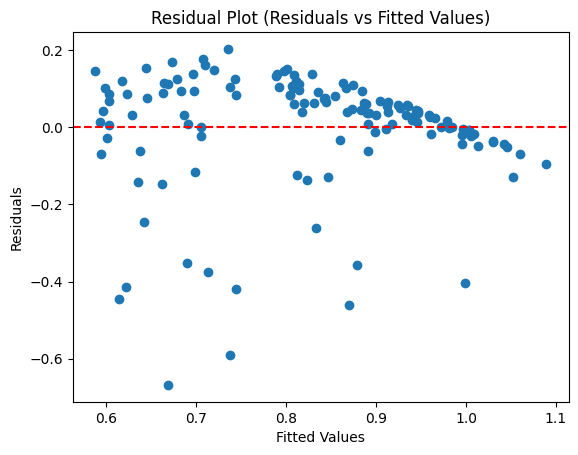

In [57]:
plt.scatter(ypred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Residuals vs Fitted Values)')
plt.show()

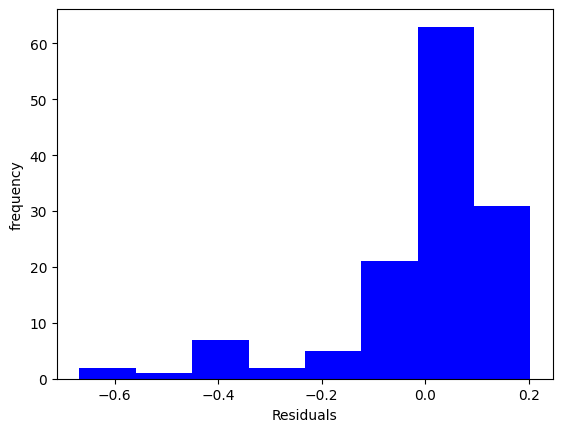

In [58]:
plt.hist(residuals, bins=8, color="blue")
plt.xlabel("Residuals")
plt.ylabel("frequency")
plt.show()

This is not a preferable residual plot. This is the points are not distributed normally, As many points are clustered above the line whereas there is large deviation below the line. Also there appears to be a pattern with less positive residuals for higher fitted values.

In [59]:
predvalues = res.predict(X_test)
print(predvalues* 100)

100     85.868347
136     99.283481
78      67.333458
56      81.398427
97      85.959315
29      69.514759
104     91.441488
82      78.733372
162     99.887623
108     91.266707
19      61.152990
42      74.109280
15      64.105985
67      82.114468
24      87.397883
31      76.574986
131     92.825911
51      79.000655
101     71.049301
16      63.745740
76      77.586388
18      60.007500
12      66.760822
9       66.125917
132     96.803723
75      83.757232
135     94.180393
60      86.122640
55      84.340284
146    103.554446
30      57.441611
140     92.744042
119     88.858764
85      75.347744
dtype: float64


In [ ]:
mse = mean_squared_error(y_test, predvalues)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)